<a href="https://colab.research.google.com/github/matheusrb/EDA_Airbnb_Florenca/blob/master/Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*, além de colaborar com entusiastas da área na hora de viajar, afinal, nada mais prazeroso que unir duas coisas prazerosas.

<center><img alt="Analisando Airbnb" width="10%" src="https://avatars.githubusercontent.com/u/698437?s=280&v=4"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Florença, na Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

In [43]:
#importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

pd.options.display.max_columns = None
%matplotlib inline

## Função filtro de Outliers
Baseado no intervalo interquartil multiplicado de um fator (que fornece uma folga aos limites superior e inferior) é definido um range aceitavel de valores para uma determinada variável. O método implementado abaixo foi desenvolvido por `John Tukey` _(John Tukey, Exploratory Data Analysis, Addison-Wesley, 1977, pp. 43-44 )_ e é chamado de _`Tukey Fences`_, por usar limites superior e inferior como limitadores.

De maneira geral, Tukey recomenda um fator de 1.5 para remoção de outliers e 3.0 para filtrar valroes completamente fora do range aceitável.

Uma explicação objetiva sobre o método e sobre outliers pode ser encontrada [neste link da comunidade IBM](https://community.ibm.com/community/user/ai-datascience/blogs/moloy-de1/2021/03/23/points-to-ponder).

In [44]:
def removeoutliers(df, coluna, fator):

    fator = fator
    q3, q1 = np.percentile(df[coluna], [75, 25])
    iqr = q3 - q1
    inferior = q1 - (iqr * fator)
    superior = q3 + (iqr * fator)
    
    df = df.loc[(df[coluna] >= inferior) & (df[coluna] <= superior)]

    #return inferior, superior, q1, q3
    return df

## Análise dos Dados

In [46]:
#criação do dataframe com dados brutos
df = pd.read_csv("https://raw.githubusercontent.com/matheusrb/Data_Science/master/Data/Florence_Toscana_Italy.csv")
df['define_preco'] = 'Normal'

In [47]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'define_preco'],
      dtype='object')

### Dicionário de variáveis

* _*id*_ - Númeri de ID gerado para identificar o imóvel
* _*name*_ - Nome do imóvel
* _*host_id*_ - ID do host (quem aluga o imóvel, presumidamente o dono)
* _*host_name*_ - Nome do host
* _*neighbourhood_group*_ - Esta colunao nao possui nenhum valor válido
* _*neighbourhood*_ - Nome do bairro
* _*latitude*_ - Coordenada de latitude do imóvel
* _*longitude*_ - Coordenada de longitude do imóvel
* _*room_type*_ - Tipo de acomodação, podendo ser classificada em:

    0. _Entire home/apt_ - casa ou apartamento todo
    1. _Hotel room_ - Quarto de hotel
    2. _Private room_ - Quarto particular
    3. _Shared room_ - Quarto compartilhado

* _*price*_ - Preço da diária
* _*minimum_nights*_ - Número mínimo de pernoites da estadia
* _*number_of_reviews*_ - Número de avaliações (Contém aproximadamente 86.32% dos valores inválidos)
* _*last_review*_ - Data da ultima avaliação (Contém aproximadamente 86.32% dos valores inválidos)
* _*reviews_per_month*_ - Número de avaliações mensais 
* _*calculated_host_listings_count*_ - Quantidade de imóveis do mesmo anfitrião
* _*availability_365*_ - Disponibilidade do imóvel dentro de 365 dias
* _*number_of_reviews_ltm*_ - Número de avaliações dos ultimos 12 meses
* _*license*_ - Número de registro da licença/permissão para alugueis de curto prazo
* _*define_preco*_ - Coluna que define preço entre barato, normal e caro baseado na proposta do usuário mais abaixo

<div class="alert alert-block alert-warning">
<b>Atenção:</b> Algumas variáveis categoricas foram passadas de string para inteiros, tais variaveis estão listadas acima com seu respectivo índice após a modificação.
</div>

In [48]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,define_preco
0,765077767968798116,"Cute, comfy and cozy appartment",137812354,Adrian Tiziano,NaN,Campo di Marte,43.77957,11.29768,Entire home/apt,80,1,0,NaN,NaN,5,179,0,NaN,Normal
1,11691059,"On the hill, close to the center",54485943,Stefano,NaN,Gavinana Galluzzo,43.75000,11.22710,Hotel room,110,2,177,2023-02-10,2.08,3,345,41,NaN,Normal
2,15662721,"Panoramic, WiFi/lan 800Mb/sec (FTTH)",101123884,Enrico,NaN,Campo di Marte,43.77255,11.29244,Entire home/apt,100,2,138,2022-10-23,1.85,1,282,18,NaN,Normal
3,6192477,Stanza affreschi - B&B Borgo Ponte,403066,Paola,NaN,Gavinana Galluzzo,43.74172,11.21258,Private room,140,2,0,NaN,NaN,3,310,0,NaN,Normal
4,53393270,EDI HOUSE COVERCIANO,394682925,Simona,NaN,Campo di Marte,43.78062,11.29255,Entire home/apt,70,2,11,2022-12-18,1.15,1,4,11,NaN,Normal


### Número de entradas do Data Set
Contando o número de variáveis, ou seja, o que o dataframe traz de informação nas colunas, o tipo de cada uma e a quantidade de valores válidos para cada coluna

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10867 entries, 0 to 10866
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10867 non-null  int64  
 1   name                            10865 non-null  object 
 2   host_id                         10867 non-null  int64  
 3   host_name                       10867 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10867 non-null  object 
 6   latitude                        10867 non-null  float64
 7   longitude                       10867 non-null  float64
 8   room_type                       10867 non-null  object 
 9   price                           10867 non-null  int64  
 10  minimum_nights                  10867 non-null  int64  
 11  number_of_reviews               10867 non-null  int64  
 12  last_review                     

In [50]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.086700e+04,1.086700e+04,0.0,10867.000000,10867.000000,10867.000000,10867.000000,10867.000000,9381.000000,10867.000000,10867.000000,10867.000000
mean,1.661300e+17,1.260551e+08,NaN,43.774068,11.253684,208.317015,4.472439,61.322352,1.530628,12.762768,156.233919,16.108126
std,3.012047e+17,1.472519e+08,NaN,0.009387,0.015929,1850.990716,32.910350,96.758380,1.550241,29.216734,112.985725,21.733599
min,3.184000e+04,1.565100e+04,NaN,43.726430,11.159850,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.545956e+07,1.428555e+07,NaN,43.768778,11.245765,74.000000,1.000000,3.000000,0.360000,1.000000,47.000000,0.000000
50%,3.370182e+07,5.586427e+07,NaN,43.772620,11.254051,103.000000,2.000000,20.000000,1.000000,3.000000,163.000000,6.000000
75%,5.355265e+07,1.973869e+08,NaN,43.778057,11.261114,160.000000,3.000000,76.000000,2.250000,9.000000,253.000000,25.000000
max,8.498919e+17,5.058353e+08,NaN,43.825990,11.336160,95195.000000,1125.000000,977.000000,10.920000,177.000000,365.000000,142.000000


### Decodificação de variaveis categoricas para variaveis numericas

In [51]:
#Codificando o tipo da acomodação
le = LabelEncoder()
le.fit(df.room_type)
print(le.classes_)
df.room_type = le.transform(df.room_type)
print(df.room_type.unique())

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']
[0 1 2 3]


### Percentual de valores nulos ou ausentes para cada variável

In [52]:
#Inicializa variáveis
numero_de_entradas = df.shape[0]
nome_colunas = df.columns
valores_faltantes = []

for i in range(0, nome_colunas.shape[0]):
    percentual = df[nome_colunas[i]].isnull().sum()/numero_de_entradas*100
    print("Percentual de valores vazios na coluna {}: {:.2f}%".format(nome_colunas[i], percentual))
    valores_faltantes.append([nome_colunas[i], percentual])


Percentual de valores vazios na coluna id: 0.00%
Percentual de valores vazios na coluna name: 0.02%
Percentual de valores vazios na coluna host_id: 0.00%
Percentual de valores vazios na coluna host_name: 0.00%
Percentual de valores vazios na coluna neighbourhood_group: 100.00%
Percentual de valores vazios na coluna neighbourhood: 0.00%
Percentual de valores vazios na coluna latitude: 0.00%
Percentual de valores vazios na coluna longitude: 0.00%
Percentual de valores vazios na coluna room_type: 0.00%
Percentual de valores vazios na coluna price: 0.00%
Percentual de valores vazios na coluna minimum_nights: 0.00%
Percentual de valores vazios na coluna number_of_reviews: 0.00%
Percentual de valores vazios na coluna last_review: 13.67%
Percentual de valores vazios na coluna reviews_per_month: 13.67%
Percentual de valores vazios na coluna calculated_host_listings_count: 0.00%
Percentual de valores vazios na coluna availability_365: 0.00%
Percentual de valores vazios na coluna number_of_revie

### Remoção de colunas com valores nulos muito altos
Em alguns casos é possível de se ajustar os valores faltantes, mas nos casos das colunas 'neighbourhood_group' e 'license' há valores faltantes demais, além disso, no caso de 'license' há uma particularidade que impossibilitaria o preenchimento dos dados utilizando algum tipo de estratégia. 
Por sorte, nenhuma das 2 colunas impactará de maneira representativa em nossa análise

In [53]:
df.drop(labels=['neighbourhood_group','license'], axis=1, inplace=True)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'define_preco'],
      dtype='object')

### Distribuição das Variáveis

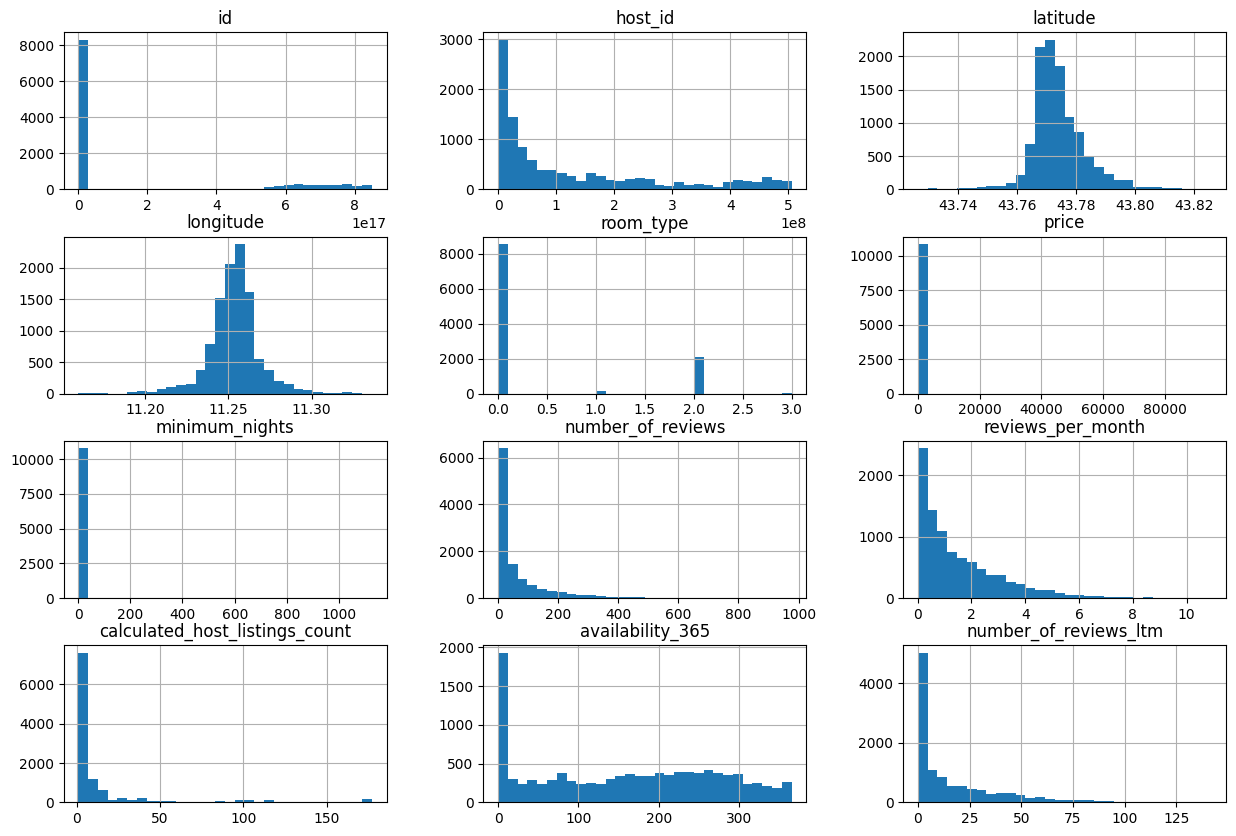

In [70]:
df.hist(bins=30, figsize=(15,10));

A partir dos histogramas é possível identificar que há uma dominância expressival de imóveis inteiros disponíveis para se alugar (categoria 0), seguidos por uma parcela tímida de quartos em propriedades particulares, além disso é notável a existência de alguns outliers, tratados na seção abaixo.

## Encontrando outliers
Baseado nos histogramas acima, é possível identificarmos alguns valores que parecem pouco razoáveis para uma análise fidedigna à realidade, tais valores sao considerados outliers, dessa maneira, para uma análise mais precisa, vamos filtra-los e substituílos por valores mais coerentes. A ideia é tentar manter as outras informações referentes ao imóvel.
De maneira visual, pudemos encontrar outliers representativos nas colunas 'minimum_nights' e 'price', ambas importantes para nossa análise.

In [55]:
print("maior numero na coluna 'minimun_nights': {}" .format(df.minimum_nights.max()))
print("menor numero na coluna 'minimun_nights': {}" .format(df.minimum_nights.min()))

print("menor numero na coluna 'price': {}" .format(df.price.min()))
print("maior numero na coluna 'price': {}" .format(df.price.max()))


maior numero na coluna 'minimun_nights': 1125
menor numero na coluna 'minimun_nights': 1
menor numero na coluna 'price': 9
maior numero na coluna 'price': 95195


### Filtragem de outliers

Notamos que, apesar de plenamente possível, é pouco razoável cobrar-se mais de 95.000 USD por noite. Além disso, se exigir uma estadia mínima de mais de 3 anos é algo sem sentido, dessa maneira, foi criado um filtro para se excluir outliers.

O método de filtragem foi explicado acima e usa o intervalo entre primeiro e terceiro quartil para definição de limites superior e inferior aceitáveis para um valor qualquer.

Nota-se que os valores de fatores de filtragem nao condizem com o proposto pela teoria, uma vez que 1.5 (proposto por Tukey) levaria a uma filtragem agressiva demais e pouco condizente com a realidade de aluguéis de curta temporada.

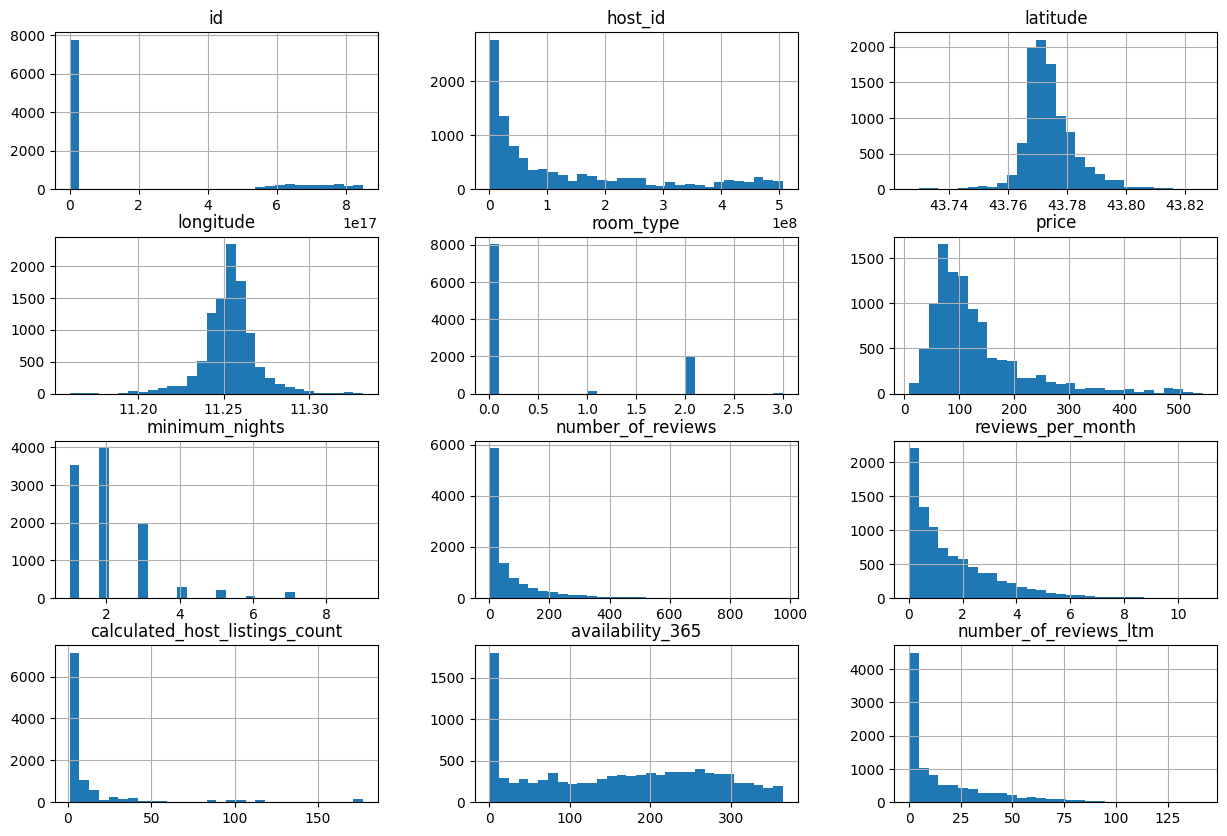

In [56]:
df_clean = removeoutliers(df, 'minimum_nights', 3.0)
df_clean = removeoutliers(df_clean, 'price', 4.5)
df_clean.hist(bins=30, figsize=(15,10));

## Correlação entre as variáveis

Neste ponto do notebook vamos medir o quanto uma variável impacta na outra dentro do data frame ja limpo de outliers.

In [57]:
#Cria matriz de correlação entre as variáveis
corr = df_clean[['price', 'minimum_nights', 
                 'number_of_reviews', 
                 'calculated_host_listings_count', 
                 'availability_365', 
                 'latitude', 
                 'longitude']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude
price,1.000000,-0.036534,-0.120449,0.156959,0.138909,-0.133625,0.054551
minimum_nights,-0.036534,1.000000,-0.002693,-0.152938,-0.079210,-0.012339,0.026871
number_of_reviews,-0.120449,-0.002693,1.000000,-0.115821,-0.013016,-0.036295,-0.005994
calculated_host_listings_count,0.156959,-0.152938,-0.115821,1.000000,0.102266,-0.073432,0.033427
availability_365,0.138909,-0.079210,-0.013016,0.102266,1.000000,-0.045426,0.026423
latitude,-0.133625,-0.012339,-0.036295,-0.073432,-0.045426,1.000000,-0.135063
longitude,0.054551,0.026871,-0.005994,0.033427,0.026423,-0.135063,1.000000


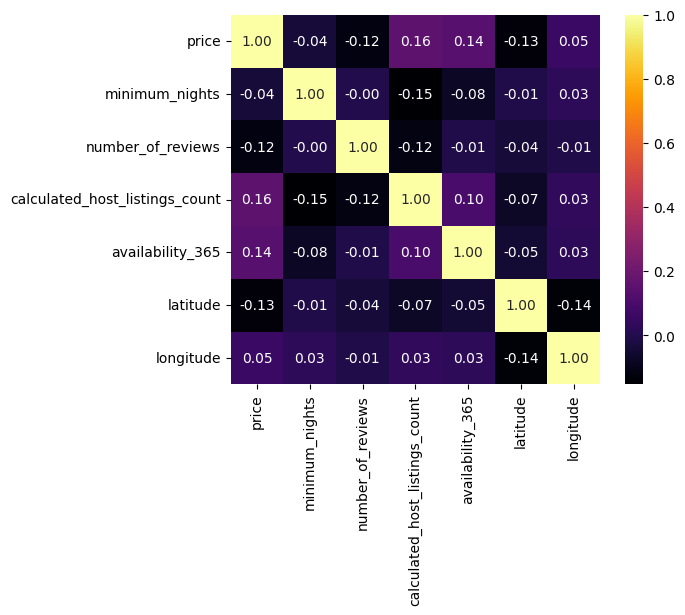

In [58]:
sns.heatmap(corr, cmap='inferno', fmt='.2f', square=True, linecolor='white', annot=True);

## Qual a localidade mais cara em Florença

In [59]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Centro Storico       141.253708
Gavinana Galluzzo    106.600575
Isolotto Legnaia      98.238916
Campo di Marte        96.996832
Rifredi               88.112903
Name: price, dtype: float64

Dado o teor histórico da cidade, é coerente assumir que de fato o centro histórico tem valores mais elevados, uma vez que é a razão de Florença ser uma cidade turística na Itália. A distribuição de endereços por região também se faz coerente, não existindo valores tao pequenos que imapctariam na média e a deixariam incoerente.

In [60]:
df_clean.neighbourhood.value_counts()

Centro Storico       7686
Campo di Marte        947
Rifredi               806
Isolotto Legnaia      406
Gavinana Galluzzo     348
Name: neighbourhood, dtype: int64

## Pontos turísticos
Aproveitando a análise dos dados e dando propósito a ela, listei abaixo alguns pontos turísticos que atraíram minha atenção e que gostaria de visitar, pensando em uma possível viagem para o local. Apesar de a Europa ser um pouco distante da realidade hoje, sonhar grande ou pequeno dá o mesmo trabalho.
Note que a lista foi gerada com o auxilio do ChatGPT, algo que evitou o trabalho braçal de se encontrar as coordenadas das atrações. Isso pode ser feito levando-se em consideração que as coordenadas são praticamente imutáveis, ou seja, independente de quando a IA foi treinada, as coordenadas seriam as mesmas, contanto que a atração ja existisse naquele dado momento de tempo.<br>

*Fonte*: [*Lista de pontos turiticos de Florença*](https://florencetips.com/tourist-attractions.html?gad=1&gclid=CjwKCAjw6vyiBhB_EiwAQJRopvg3a9R9bj_vsw6Be_3dXCTZ-gSuUDGnaJ4cDSZ-2ELbRODOnhfRZRoC_BUQAvD_BwE)

In [61]:
nomes = [
    "Duomo di Firenze",
    "Ponte Vecchio",
    "Galleria degli Uffizi",
    "Palazzo Vecchio",
    "Giardino di Boboli",
    "Mercato Centrale",
    "Cappelle Medicee",
    "Museo Leonardo da Vinci"
]

latitudes = [
    43.7738,
    43.7679,
    43.7676,
    43.7696,
    43.7629,
    43.7771,
    43.7744,
    43.7765
]

longitudes = [
    11.2559,
    11.2532,
    11.2554,
    11.2565,
    11.2511,
    11.2536,
    11.2537,
    11.2544
]

coordenadas_pontos_turisticos = pd.DataFrame({'Nome' : nomes, 
                                              'Latitude' : latitudes, 
                                              'Longitude' : longitudes})

In [62]:
coordenadas_pontos_turisticos

,Nome,Latitude,Longitude
0,Duomo di Firenze,43.7738,11.2559
1,Ponte Vecchio,43.7679,11.2532
2,Galleria degli Uffizi,43.7676,11.2554
3,Palazzo Vecchio,43.7696,11.2565
4,Giardino di Boboli,43.7629,11.2511
5,Mercato Centrale,43.7771,11.2536
6,Cappelle Medicee,43.7744,11.2537
7,Museo Leonardo da Vinci,43.7765,11.2544


## Visualização de dados 

Abaixo tem-se uma visualização de dados facilitada para o usuário, que pode limitar os valores que considera razoaveis apra caro e barato nos campos a direita antes de rodar a célula, bem como selecionar no grafico quais acomodações deseja exibir baseado no que foi definido

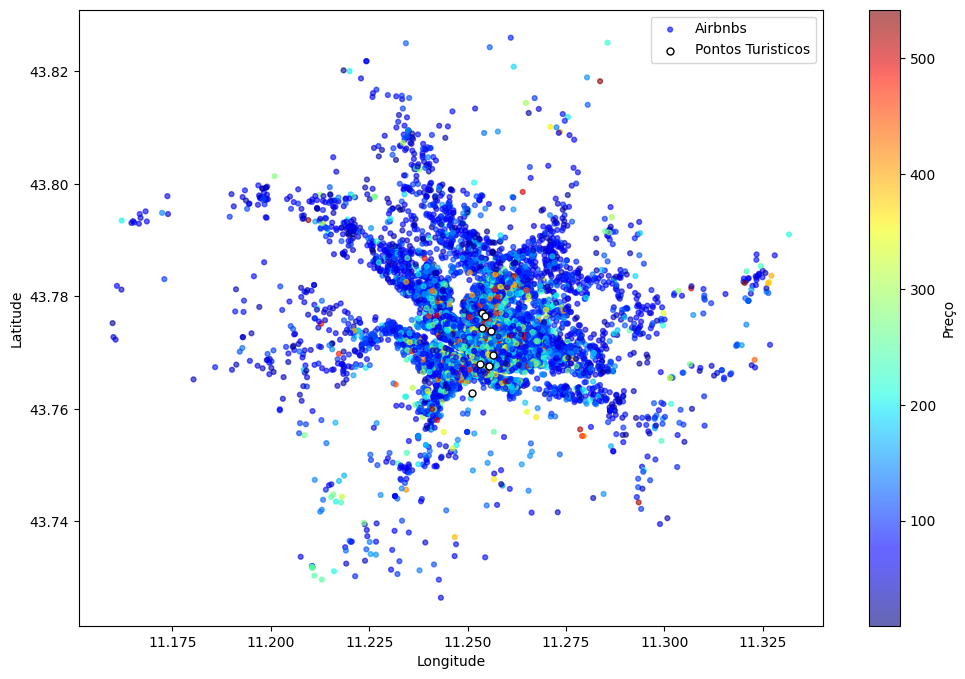

In [64]:
fig, ax = plt.subplots(figsize=(12, 8))

# plotar os imóveis pela latitude-longitude
dist_precos = ax.scatter(
            data=df_clean,
            x='longitude', 
            y='latitude', 
            alpha=0.6, 
            c=df_clean['price'], 
            s=12, 
            cmap=plt.get_cmap('jet'), 
            label= 'Airbnbs'
                                              
            );

#Plota os pontos turisticos em preto
ax.scatter(
            data=coordenadas_pontos_turisticos,
            x='Longitude', 
            y='Latitude', 
            alpha=1, 
            color='white', 
            s=25, 
            label='Pontos Turisticos',
            edgecolors='black',
                                   
            );

cbar = plt.colorbar(dist_precos)
cbar.set_label('Preço')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

plt.show();

In [84]:
preco_caro = 300 #@param {type: "", min:0, max:800, step:0.1} preço a partir do qual se considera um aluguel caro
preco_barato = 50 #@param {type: "", min:0, max:800, step:0.1} preço limite para um aluguel ser considerado barato
df_clean.loc[df.price >= preco_caro, 'define_preco'] = 'Caro'
df_clean.loc[df.price <= preco_barato, 'define_preco'] = 'Barato'

fig1 = px.scatter(df_clean, 
                 x="longitude", 
                 y="latitude", 
                 hover_name="name", 
                 color="define_preco",
                 log_x=False, 
                 size_max=55,
                 )


fig2 = px.scatter(coordenadas_pontos_turisticos,
                x='Longitude', 
                y='Latitude',
                color_discrete_sequence=['white'],
                hover_name='Nome'
                )

fig1.add_trace(fig2.data[0])

fig.update_layout(width=1200, height=800)

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()